<a class="anchor" id="0"></a>
# **Complete Guide on Time Series Analysis in Python**

Hello friends,

As the name implies, this notebook is all about **Time Series Analysis**. A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques. 

So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Time Series Analysis](#1)
2.	[Types of data](#2)
3.	[Time Series terminology](#3)
4.	[Time Series Analysis](#4)
5.	[Visualize the Time Series](#5)
6.	[Patterns in a Time Series](#6)
7.	[Additive and Multiplicative Time Series](#7)
8.	[Decomposition of a Time Series](#8)
9.	[Stationary and Non-Stationary Time Series](#9)
10.	[How to make a time series stationary](#10)
11.	[How to test for stationarity](#11)
    - 11.1	[Augmented Dickey Fuller test (ADF Test)](#11.1)
    - 11.2	[Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)](#11.2)
    - 11.3	[Philips Perron test (PP Test)](#11.3)
12.	[Difference between white noise and a stationary series](#12)
13.	[Detrend a Time Series](#13)
14.	[Deseasonalize a Time Series](#14)
15.	[How to test for seasonality of a time series](#15)
16.	[Autocorrelation and Partial Autocorrelation Functions](#16)
17.	[Computation of Partial Autocorrelation Function](#17)
18.	[Lag Plots](#18)
19.	[Granger Causality Test](#19)
20.	[Smoothening a Time Series](#20)
21.	[References](#21)


# **1. Introduction to Time-Series Analysis** <a class="anchor" id="1"></a>


- A **time-series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.


### **Components of a Time-Series**


- **Trend** 

- **Seasonality** 

- **Cyclical Component** 

- **Irregular Variation**

- **ETS Decomposition** 


# **2. Types of data** <a class="anchor" id="2"></a>


1 **Time series data** 


2 **Cross sectional data** Comparision of 2 variables data

3 **Pooled data**  Combined with Time Series data and Cross Sectional Data


# **3. Time Series terminology** <a class="anchor" id="3"></a>

There are various terms and concepts in time series that we should know. These are as follows:-

1	**Dependence**

2	**Stationarity**

3	**Differencing**

4	**Specification** 

5	**Exponential Smoothing** 


6	**Curve fitting** 

7	**ARIMA** 

# **4. Time Series Analysis** <a class="anchor" id="4"></a>

## **4.1 Basic set up** <a class="anchor" id="4.1"></a>

In [1]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             

## **4.2 Import data** <a class="anchor" id="4.2"></a>

In [2]:
df = pd.read_csv('AirPassengers.csv')

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# **5. Visualize the Time Series** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)


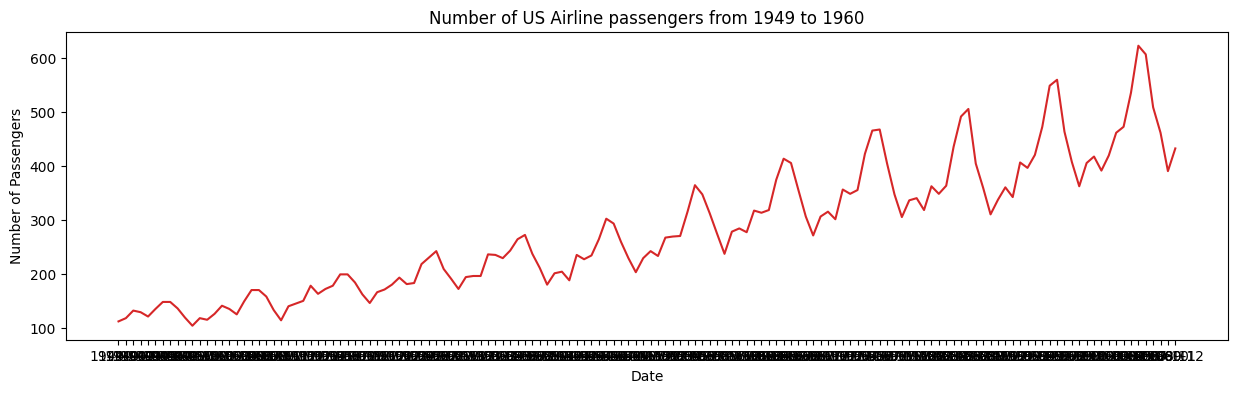

In [5]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

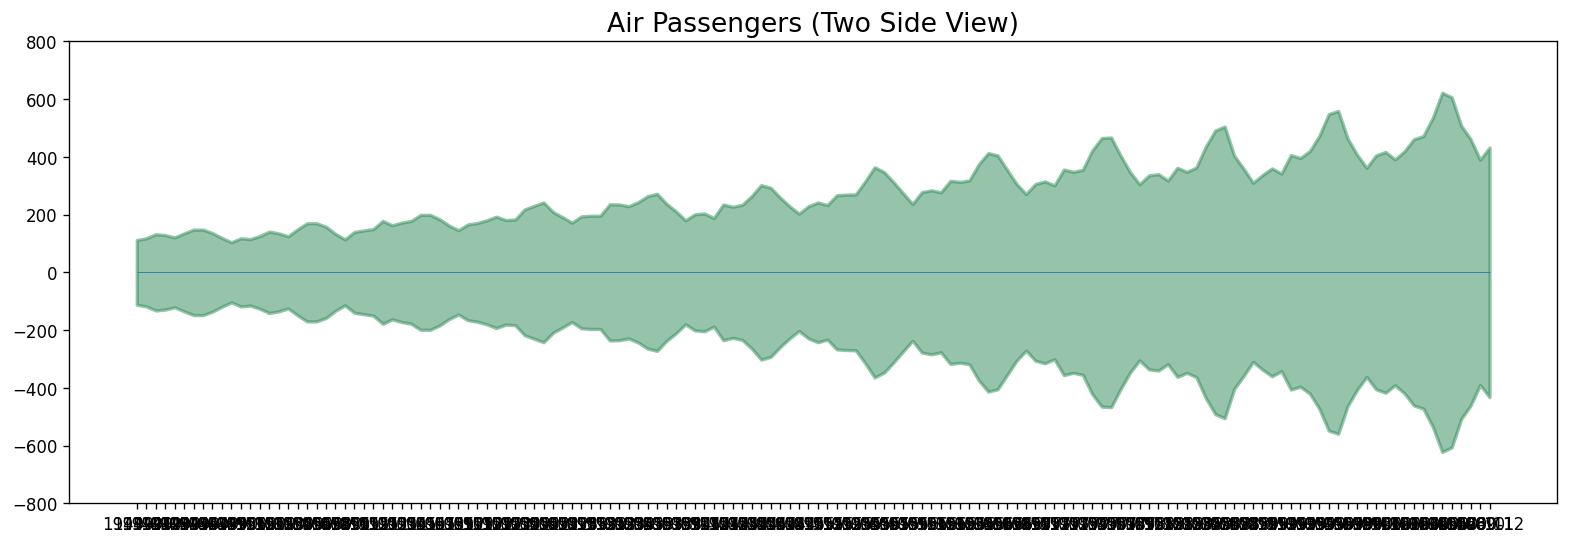

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

# **6. Patterns in a Time Series** <a class="anchor" id="6"></a>


- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


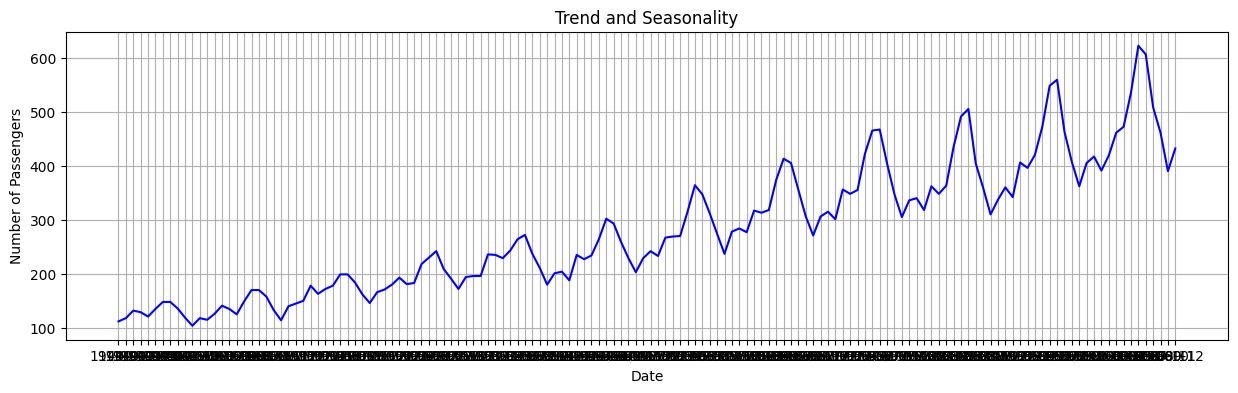

In [9]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid()
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

# **7. Additive and Multiplicative Time Series** <a class="anchor" id="7"></a>


### **Additive time series:**

Value = Base Level + Trend + Seasonality + Error


### **Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

# **8. Decomposition of a Time Series** <a class="anchor" id="8"></a>


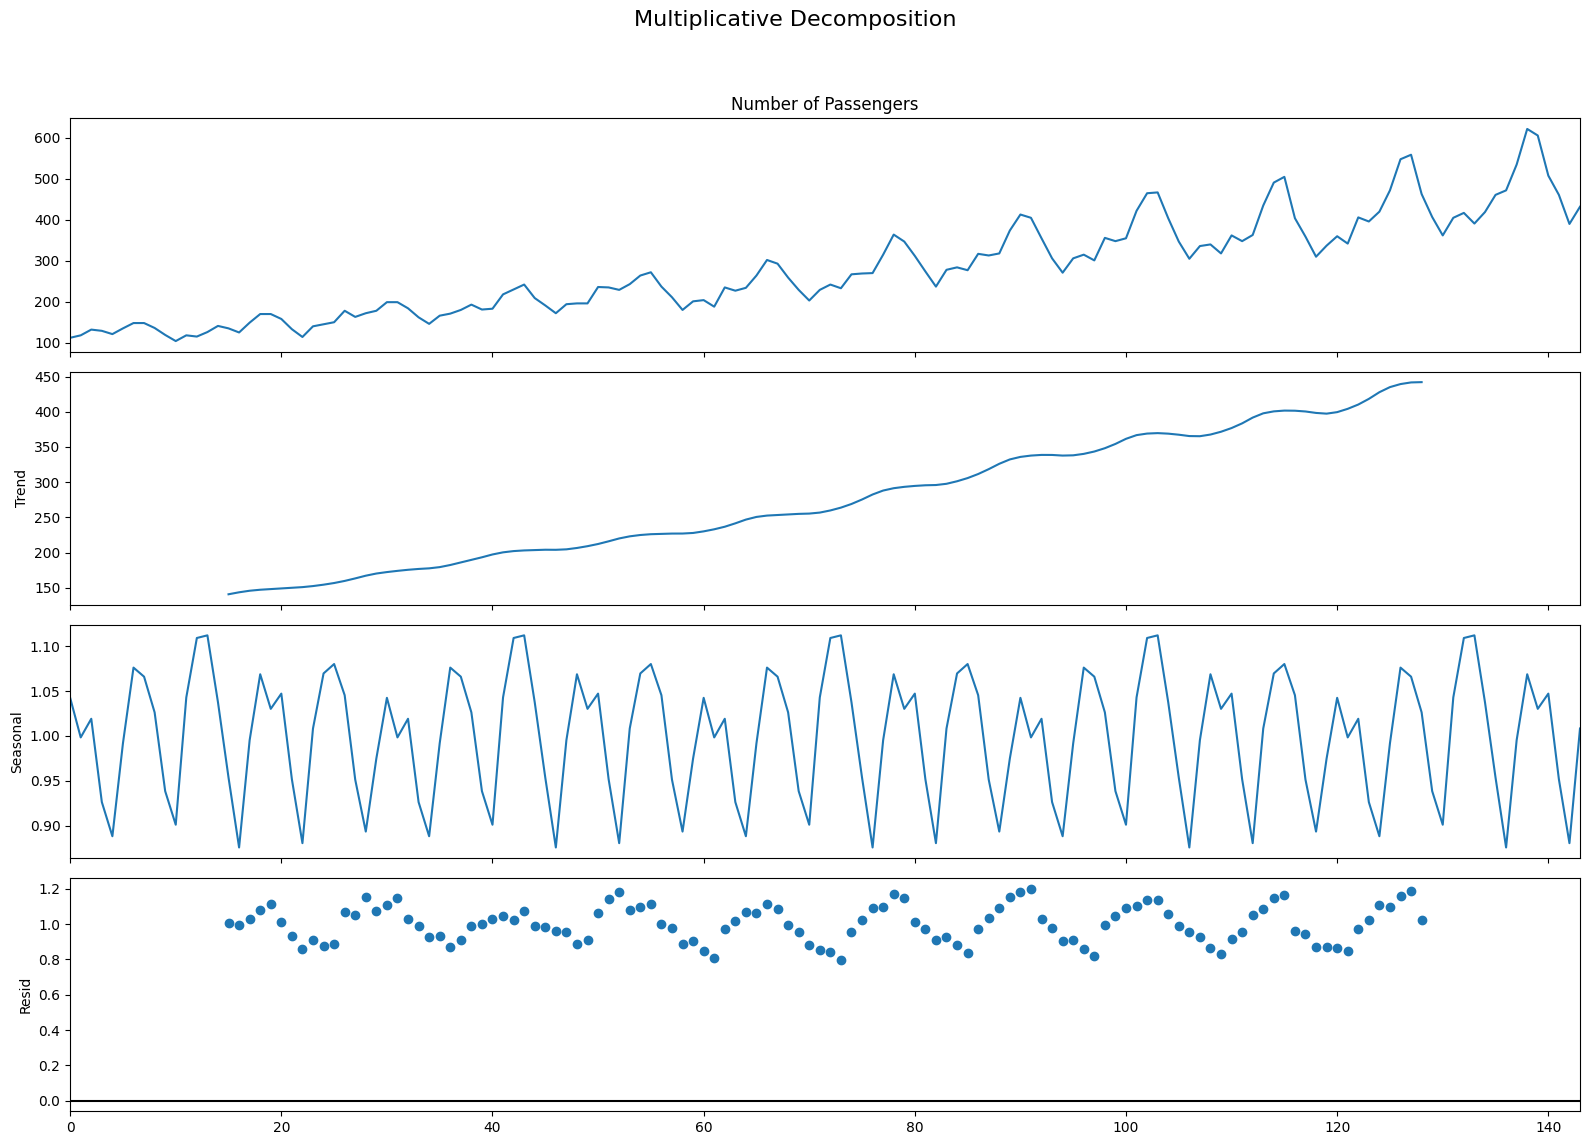

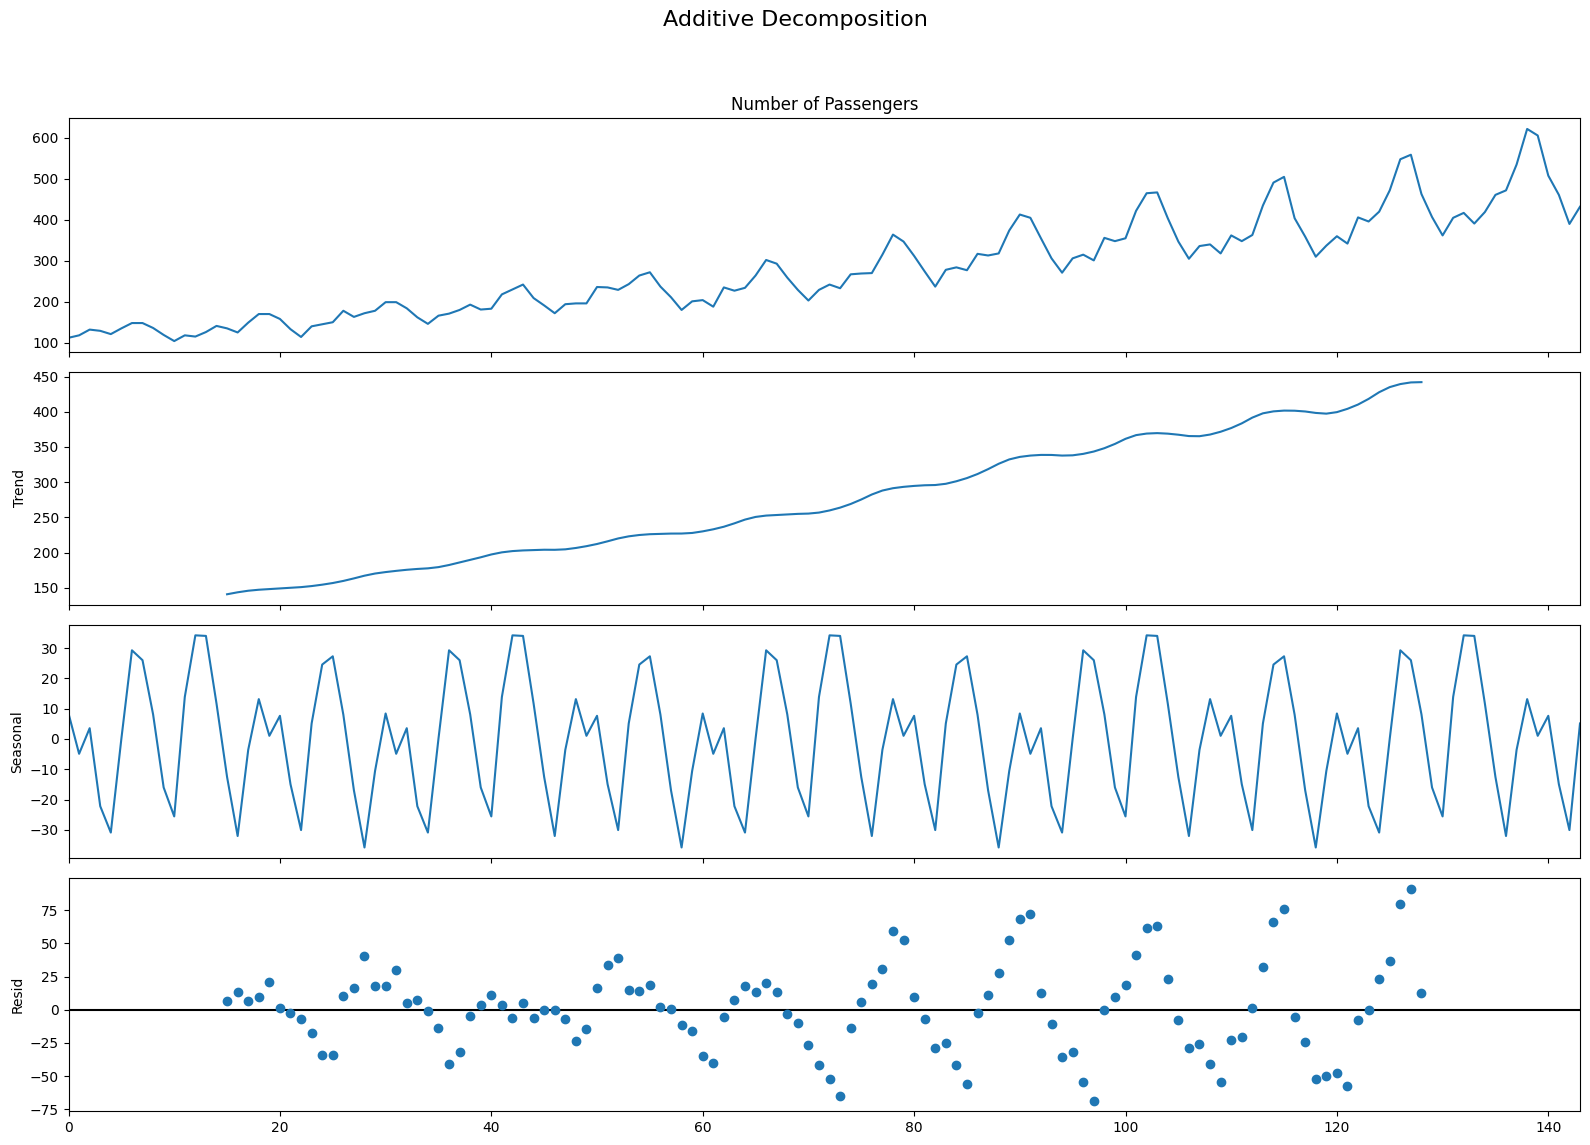

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# **9. Stationary and Non-Stationary Time Series** <a class="anchor" id="9"></a>


![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1



# **10. How to make a time series stationary?** <a class="anchor" id="10"></a>


- We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above


## **10.1 Introduction to Differencing** <a class="anchor" id="10.1"></a>

- If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.


- If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.


## **10.2 Reasons to convert a non-stationary series into stationary one before forecasting** <a class="anchor" id="10.2"></a>



# **11. How to test for stationarity?** <a class="anchor" id="11"></a>


- There are multiple implementations of Unit Root tests like:


**1. Augmented Dickey Fuller test (ADF Test)**

**2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

**3. Philips Perron test (PP Test)**




# **12. Difference between white noise and a stationary series** <a class="anchor" id="12"></a>

- Mathematically, a sequence of completely random numbers with mean zero is a white noise.

<Axes: title={'center': 'Random White Noise'}>

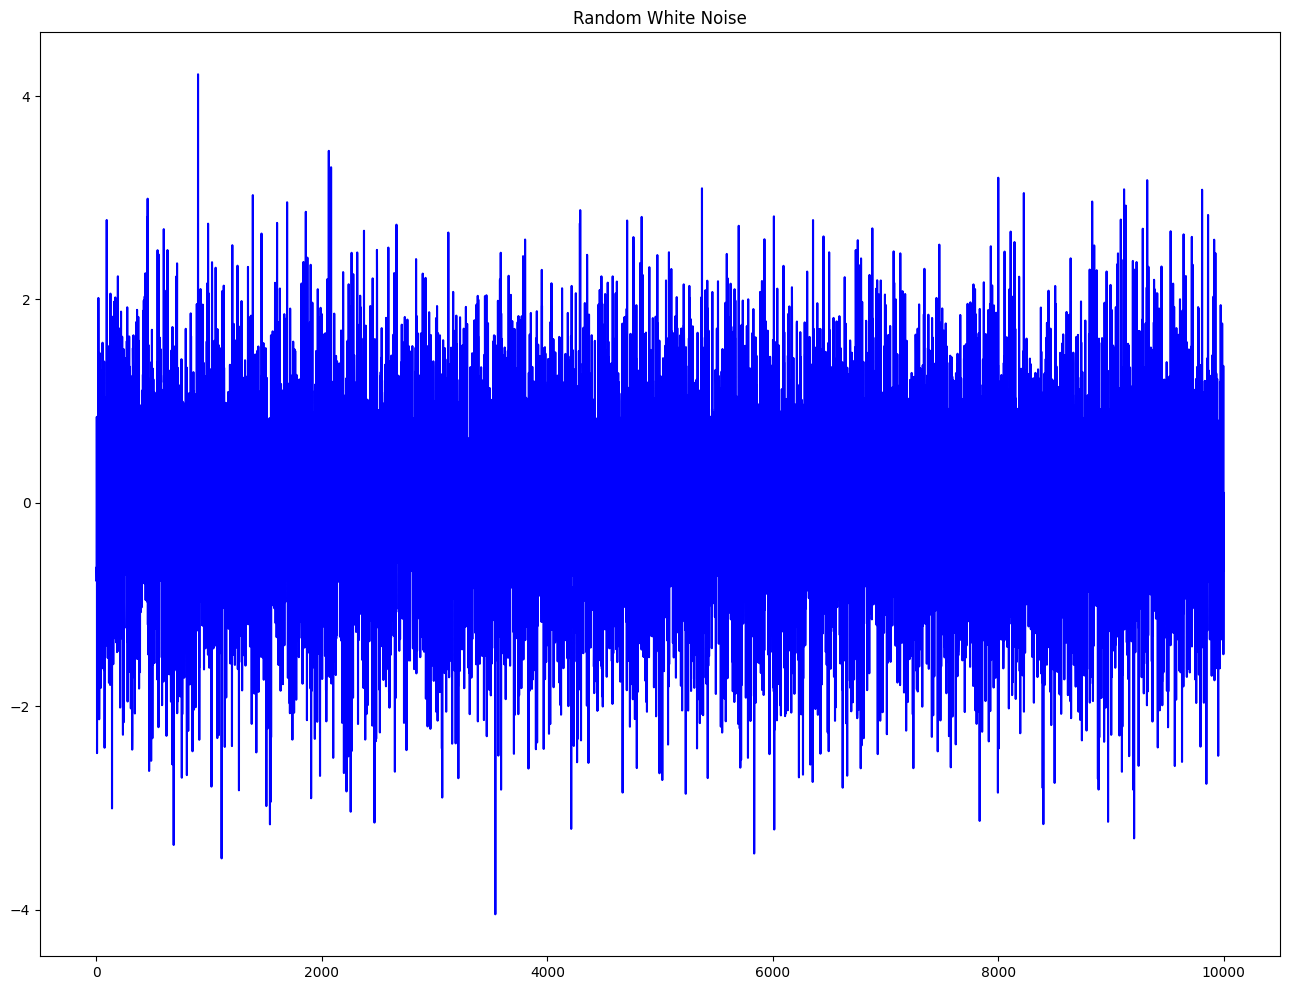

In [16]:
rand_numbers = np.random.randn(10000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

# **13. Detrend a Time Series** <a class="anchor" id="13"></a>


Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

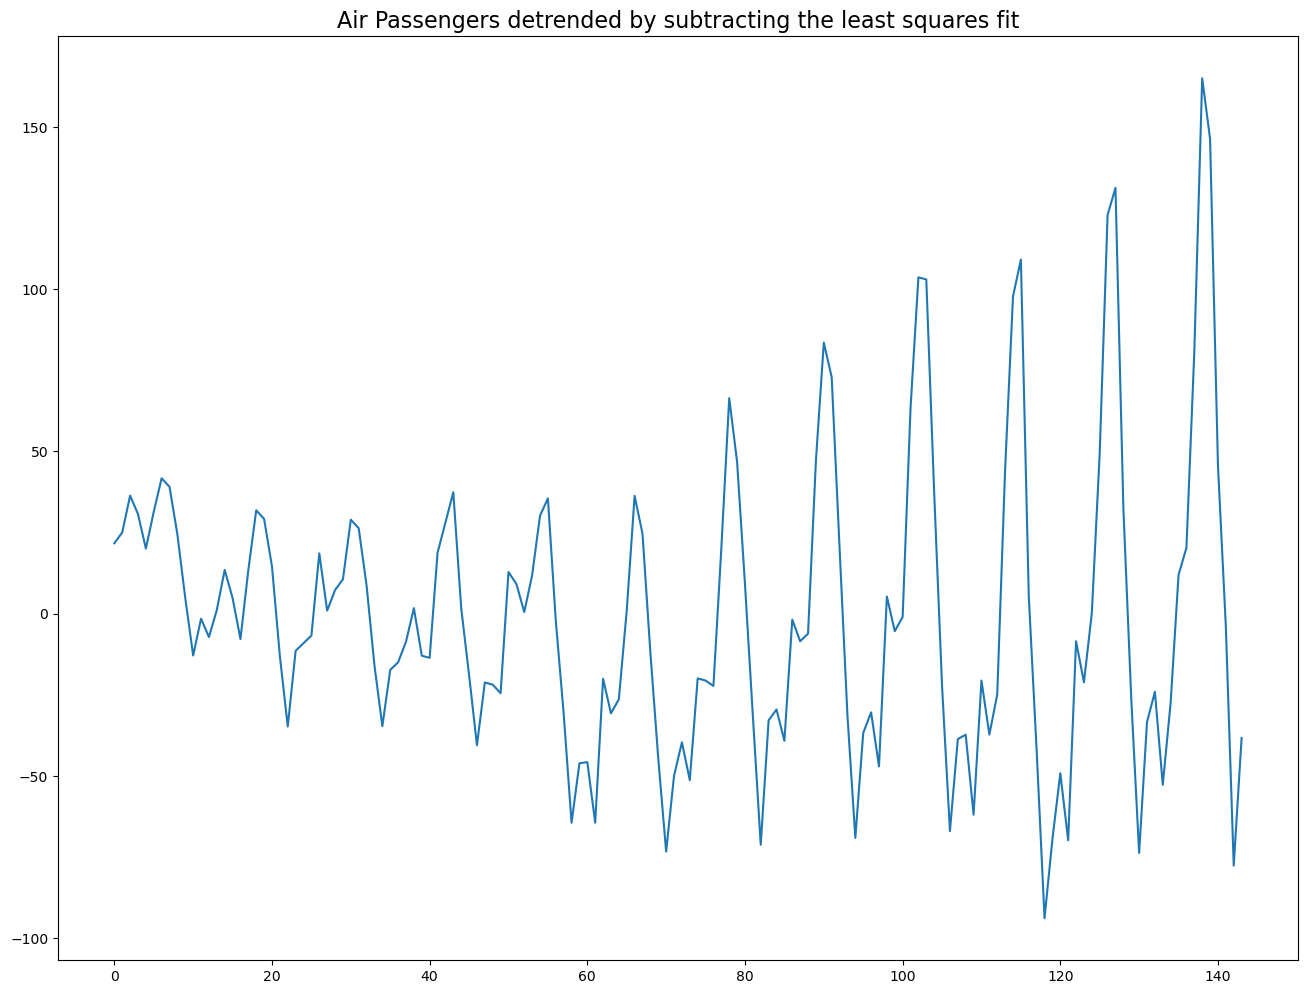

In [13]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

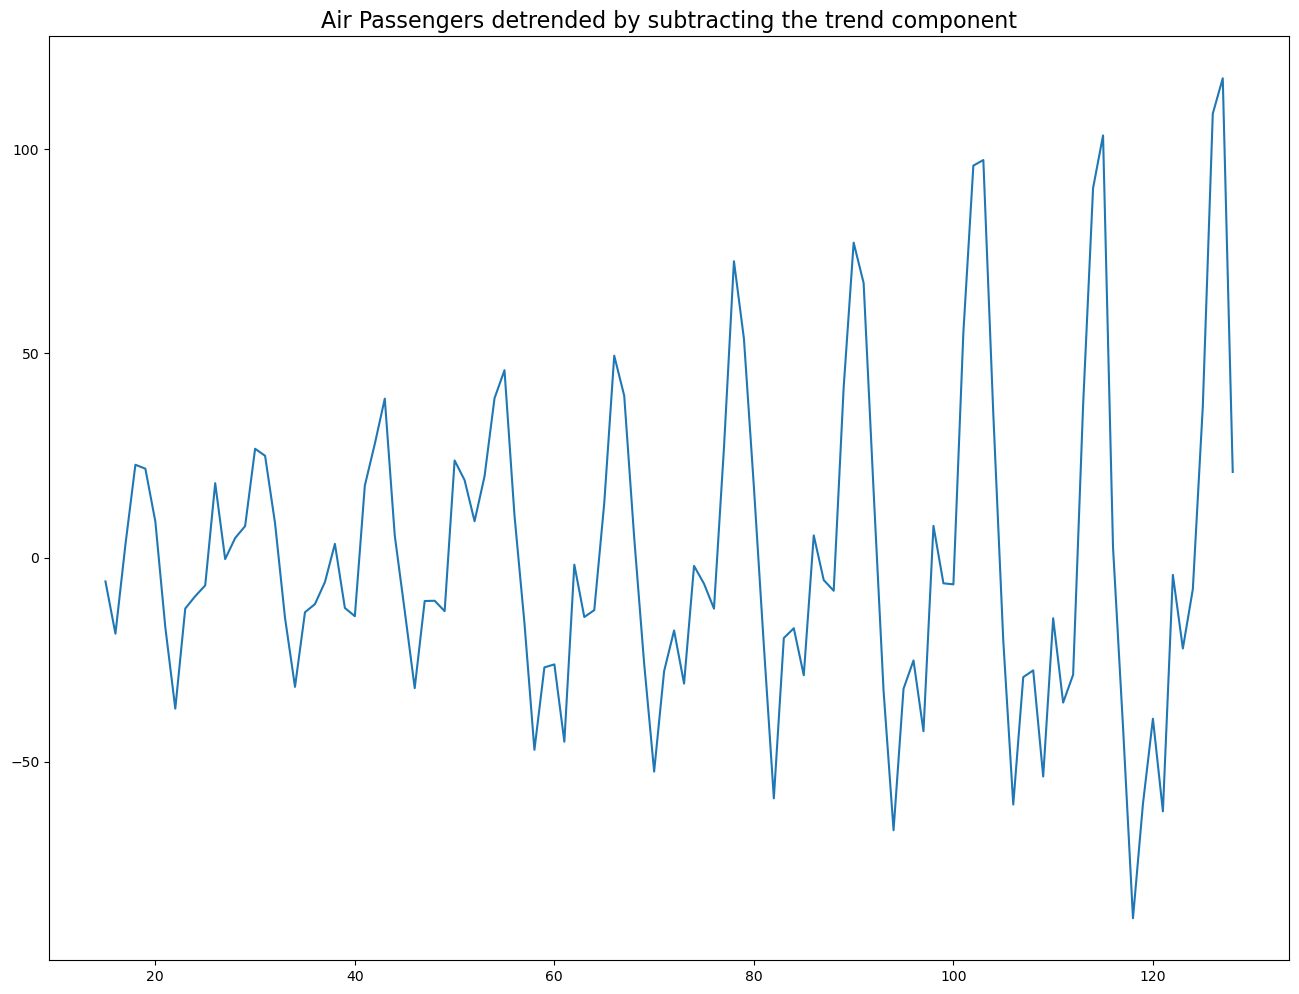

In [14]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

# **14. Deseasonalize a Time Series** <a class="anchor" id="14"></a>



[]

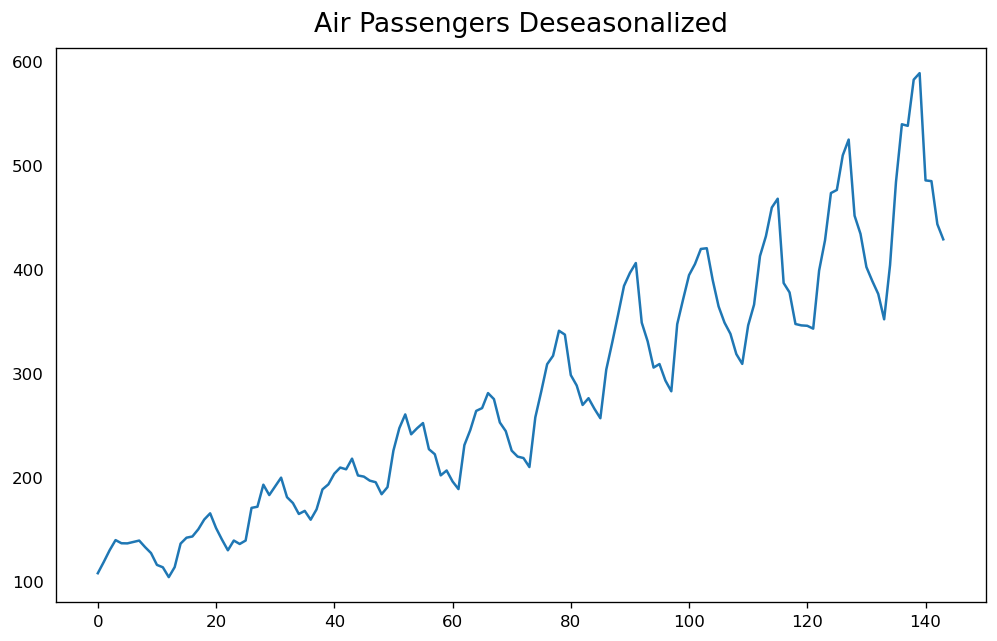

In [20]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

# **15. How to test for seasonality of a time series?** <a class="anchor" id="15"></a>

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.
1. Hour of day
2. Day of month
3. Weekly
4. Monthly
5. Yearly


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

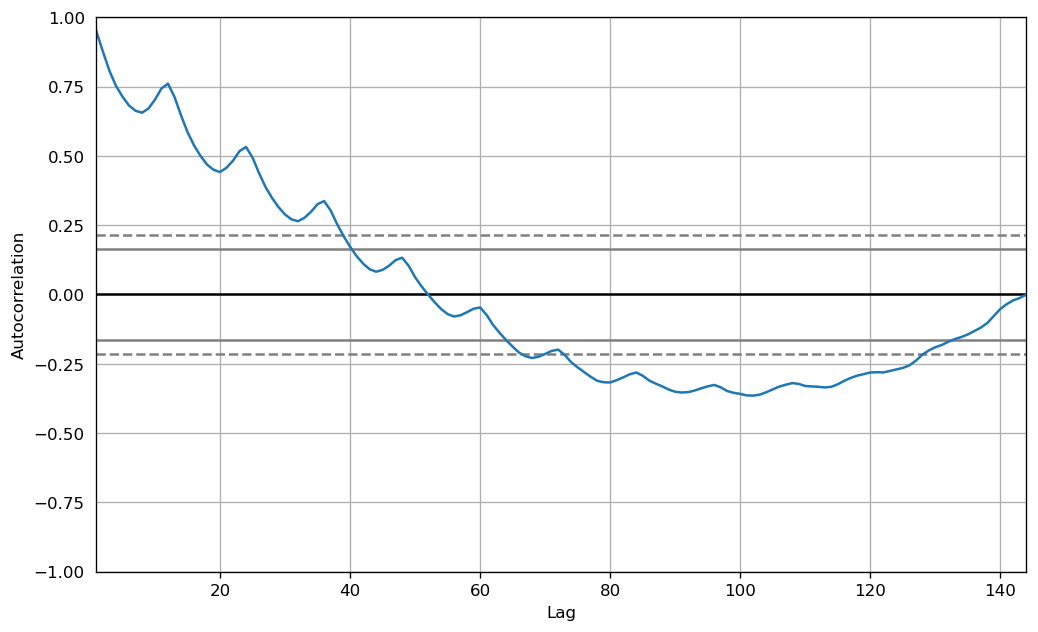

In [21]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

# **16. Autocorrelation and Partial Autocorrelation Functions** <a class="anchor" id="16"></a>


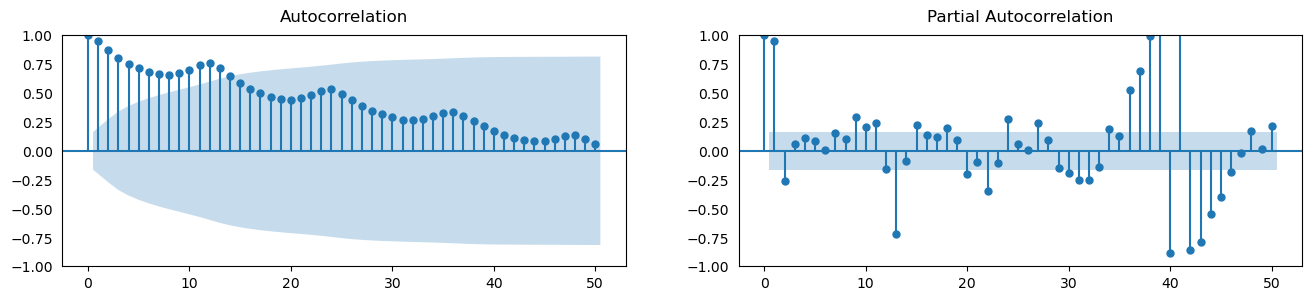

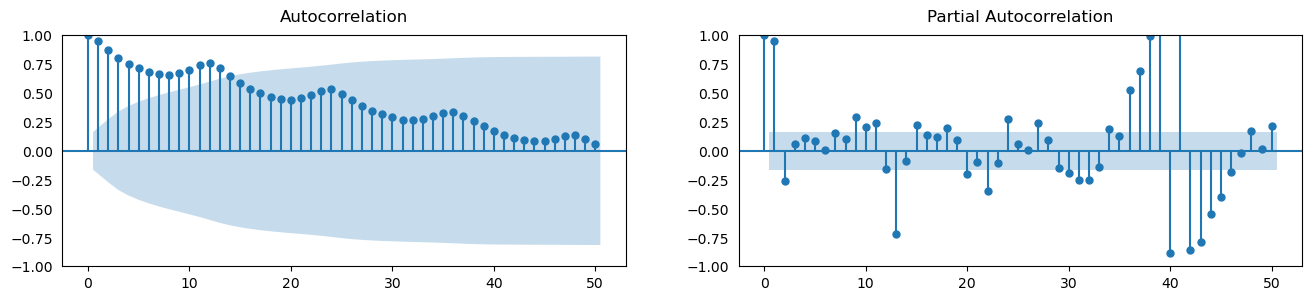

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

# **17. Computation of Partial Autocorrelation Function** <a class="anchor" id="17"></a>



![Partial Autocorrelation Function](https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1

# **18. Lag Plots** <a class="anchor" id="18"></a>



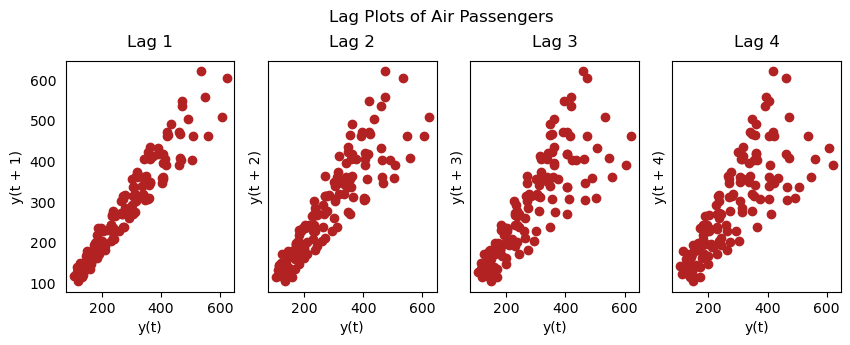

In [23]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()